In [13]:
import numpy as np
import matplotlib.pyplot as plt

def oscillator(m, lam, kappa, alpha, A, omega, y0, v0, T, dt):
    N = int(T / dt)
    y = np.zeros(N)
    v = np.zeros(N)
    t = np.linspace(0, T, N)

    y[0] = y0
    v[0] = v0

    for i in range(1, N):
        yddot = (-kappa * y[i-1] - alpha * y[i-1]**3 + A * np.cos(omega * t[i-1])) / m
        y[i] = y[i - 1] + dt * v[i - 1] + 0.5 * ((dt ** 2) * yddot - dt * lam * v[i - 1])
        ydot = (y[i] - y[i-2]) / (2*dt) if i > 1 else v[0]
        v[i] = v[i - 1] + 0.5 * dt * (-lam * v[i - 1] - kappa * (y[i] + y[i - 2]) - alpha * (y[i] ** 3 + y[i - 2] ** 3) / 2 + A * np.cos(omega * (t[i - 1] + dt / 2)))

    return t, y, v

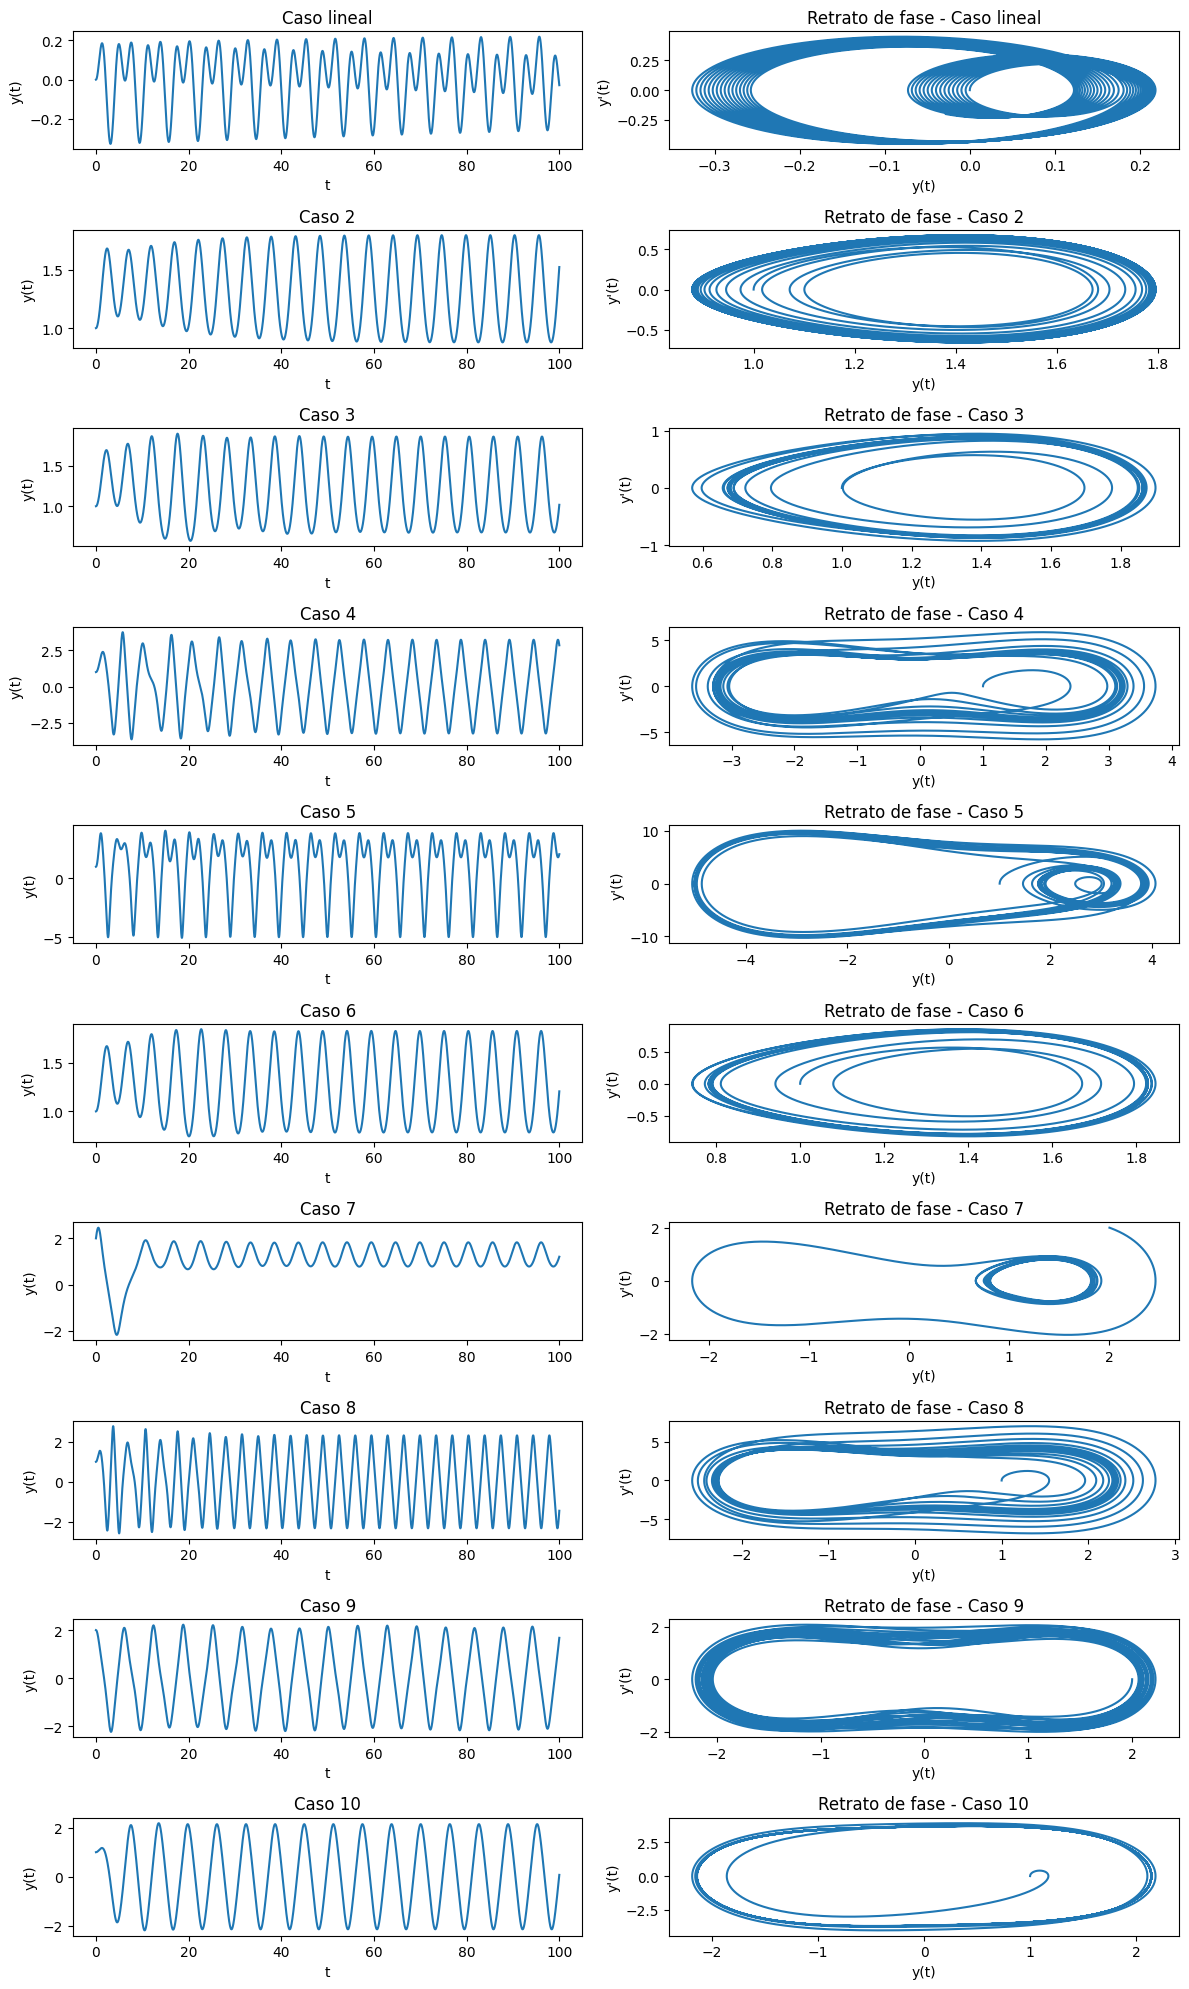

In [14]:
def plot_cases():
        T = 100
        dt = 0.001
        m = 1

        cases = [
        {'lam': 0.02, 'kappa': 1, 'alpha': 0, 'A': 1, 'omega': 2, 'y0': 0, 'v0': 0, 'title': 'Caso lineal'},
        {'lam': 0.3, 'kappa': -1, 'alpha': 1, 'A': 0.2, 'omega': 1.2, 'y0': 1, 'v0': 0, 'title': 'Caso 2'},
        {'lam': 0.3, 'kappa': -1, 'alpha': 1, 'A': 0.4, 'omega': 1.2, 'y0': 1, 'v0': 0, 'title': 'Caso 3'},
        {'lam': 0.3, 'kappa': -1, 'alpha': 1, 'A': 5, 'omega': 1.2, 'y0': 1, 'v0': 0, 'title': 'Caso 4'},
        {'lam': 0.3, 'kappa': -1, 'alpha': 1, 'A': 21, 'omega': 1.2, 'y0': 1, 'v0': 0, 'title': 'Caso 5'},
        {'lam': 0.4, 'kappa': -1, 'alpha': 1, 'A': 0.4, 'omega': 1.2, 'y0': 1, 'v0': 0, 'title': 'Caso 6'},
        {'lam': 0.4, 'kappa': -1, 'alpha': 1, 'A': 0.4, 'omega': 1.2, 'y0': 2, 'v0': 2, 'title': 'Caso 7'},
        {'lam': 0.4, 'kappa': -1, 'alpha': 4, 'A':10, 'omega': 1.8, 'y0': 1, 'v0': 0, 'title': 'Caso 8'},
        {'lam': 0.05, 'kappa': 1, 'alpha': 1, 'A': 6, 'omega': 1, 'y0': 2, 'v0': 0, 'title': 'Caso 9'},
        {'lam': 1, 'kappa': 1, 'alpha': 1, 'A': 5, 'omega': 1, 'y0': 1, 'v0': 0, 'title': 'Caso 10'}]
        n_cases = len(cases)
        fig, axs = plt.subplots(n_cases, 2, figsize=(12, 2 * n_cases))

        if n_cases == 1:
            axs = [axs]  # Convierte axs en una lista si solo hay un caso

        for i, case in enumerate(cases):
            t, y, v = oscillator(m, case['lam'], case['kappa'], case['alpha'], case['A'], case['omega'], case['y0'], case['v0'], T, dt)
            
            # Gráfico de y(t) vs t
            axs[i][0].plot(t, y)
            axs[i][0].set_title(case['title'])
            axs[i][0].set_xlabel('t')
            axs[i][0].set_ylabel('y(t)')

            # Retrato de fase: y'(t) vs y(t)
            axs[i][1].plot(y, v)
            axs[i][1].set_title('Retrato de fase - ' + case['title'])
            axs[i][1].set_xlabel('y(t)')
            axs[i][1].set_ylabel("y'(t)")

        plt.tight_layout()
        plt.show()

plot_cases()